# INFO 2950 Final Project Phase IV
Mary Kolbas (mck86)  
Tammy Zhang (tz332)  


## Introduction

Our project investigates observations of avian species at birdfeeders across North America in the winter of 2020 through the spring of 2021. The datasets behind our analysis are all provided by the Cornell Lab of Ornithology's [Project FeederWatch](https://feederwatch.org/about/project-overview/), an extensive citizen-science-based data source that annually engages US-Canada residents in a November-April survey to collect data on the birds that people see at the feeders in their backyards. In this survey, Project FeederWatch asks observers to take note of the species they notice and how many are present, as well as allowing users to input information on their backyard's characteristics; this includes what kind of habitats are present and other environmental/ambient factors. Of these numerous factors, we decided to focus on local housing density (categorized as "rural", "suburban/rural", "suburban", and "urban") as a key variable of interest relative to the species and counts observed.



### Research Question
Our general research question is divided into two main parts as follows.

**How does local housing density influence the distribution of avian species commonly observed at backyard feeders, on both a broad continental scale and on a smaller New York specific scale?**
- Part A: Is North American bird species diversity at backyard feeders independent of housing density in the immediate area?
- Part B: Do taxonomic groups in New York that share biological characteristics (like lifestyle and preferred diet/habitat) also display marked preferences for feeders with different housing densities, or are they observed at constant rates across backyards with different housing densities?


### Main Findings and Result Summary

For Research Question Part A, we discovered that there is in fact some association between US-Canada avian species diversity and a feeder's local housing density. This relationship can be approximately modeled with a linear regression $ y = 0.291 - 0.013x_1 - 0.024x_2 - 0.126x_3 $ where y represents the proportion of the total species for a region being found in a housing-density-specific area and where the baseline condition is a feeder in a rural area. Each x represents a housing density level ($x_1$ = suburban/rural, $x_2$ = suburban, and $x_3$ = urban). The overall trend suggested by our findings is that species diversity for a region (i.e. a U.S. state) decreases on average with increasing housing density (more urban areas tend to have fewer species observed at feeders).

For Research Question Part B, we focused on two main taxonomic groups that are among the most commonly observed at backyard feeders - _Accipiter_ (soaring birds of prey such as hawks) and _Junco_ (small sparrows). We surprisingly discovered that there was no statistically significant preferences for either genus among habitats with particular housing densities, even after adjusting for the different levels of total observations taking place across different areas.

Overall, we discovered that while there may exist a relationship between overall avian species diversity at backyard feeders and the local housing density the feeder is found in, the breakdown between how different taxonomic groups may preferentially associate with different housing densities is less clear. We attribute this difficulty to some of the statistical problems inherent to presence-only data such as those provided by Project FeederWatch as well as the sheer scale of the number of species included in the datasets, which are discussed in greater detail later on.

______________________________________________________________________________________________________________________

## Data Description

External libraries and other tools used in this analysis are imported as follows.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

Three main datasets from Project FeederWatch were used in our analysis:
1. All 2021 species observations across the U.S. and Canada
2. Site information for each observer's backyard
3. Species translation table

These datasets were created by Project FeederWatch for researchers seeking to conduct formal analyses, but also to have this data be freely accessible to students, journalists, and the general public. Datasets 1 and 2 are aggregated from observers that agreed to collect data for the purpose of science; they were formatted into csv files through scientists working at the Cornell Lab of Ornithology and Birds Canada. Since 2016, Project FeederWatch has been sponsored by Wild Bird Unlimited and the National Science Foundation.

Because this is community-curated data, there are many processes that may have influenced what data was observed/recorded and what was not, including mislogging information. This dataset involved a validity checker that flags odd sightings and has them checked by a reviewer. The data we will be using for this project drops invalid observations. FeederWatch also notes there may be mislogged locations in `subnational1_code` represented "XX" locations, which we dropped when choosing to only look at NY state data. 

Because this is community-curated data, there is also volunteer bias in observations, as certain locations or species may be more common in the dataset due to active and dedicated users. However, many users are also very knowledgeable about birds, and therefore can provide a lot of information and identification resources. 


Our raw datasets can be found [via Cornell Box](https://cornell.box.com/s/b2fjxp778bbxj2qxnsb7uqjo9arsssh7), or on the [FeederWatch Website](https://feederwatch.org/explore/raw-dataset-requests/).

The detailed breakdown of the observations/attributes and preprocessing procedures for each dataset are below.

### Dataset 1: all 2021 species observations

This dataset (`PFW_2021_public.csv`) is the main object of analysis, composed of observations (rows) of bird sightings at backyard feeders between November 2020 and April 2021 across the US and Canada. Each observation has attributes (columns) of the following: 

- `loc_id`: Unique identifier for each survey site
- `subnational1_code`: Country abbreviation and State or Province abbreviation of each survey site. 
- `Month`: Month of 1st day of two-day sighting
- `Day`: Month of 1st day of two-day sighting
- `Year`: Year of 1st day of two-day sighting
- `species_code`: Bird species observed, stored as 6-letter species codes
- `how_many`: Maximum number of individuals seen at one time during observation period
- `valid`: Validity of each observation based on flagging system. If the species is notably out of range, a computer will assign a score of 0 to indicate it may be an observer error; otherwise, it is assigned 1 to indicate that the observation is plausible.
- `day1_am`: binary indicating if observer watched during morning of count Day 1
- `day1_pm`: binary indicating if observer watched during afternoon of count Day 1
- `day2_am`: binary indicating if observer watched during morning of count Day 2
- `day2_pm`: binary indicating if observer watched during afternoon of count Day 2
- `snow_dep_atleast`: Participant estimate of minimum snow depth

However, many of these variables were not used in our investigation. The most relevant ones for our analysis and processing are delineated as follows.

**For Research Question A:**
- Main variables of focus: `subnational1_code`, `species_code`
- Processing: 
    - `loc_id` used for inner join with Dataset 2; `valid` used to exclude possibly inaccurate observations
    - Irrelevant columns all dropped

**For Research Question B:**
- Main variables of focus: `how_many`
- Processing: 
    - `loc_id` used for inner join with Dataset 2; `valid` used to exclude possibly inaccurate observations
    - [Zero-filling and taxonomic roll-up](https://engagement-center.github.io/Project-FeederWatch-Zerofilling-Taxonomic-Rollup-Public/) done using an R function provided by Project FeederWatch to expand the dataset from being just presence-only data and to limit errors caused by taxonomic discrepancies
    - Restricted to observations with `subnational1_code` = "US-NY" to just investigate New York observations
    - `species_code` used for inner join with Dataset 3; then restricted to species with a genus of "_Accipiter_" or "_Junco_"
    - Irrelevant columns all dropped

In [3]:
total_df = pd.read_csv("PFW_2021_public.csv")
total_df

,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method
0,L12782033,44.574148,-78.205608,CA-ON,/GOOGLE_MAP/ZOOM:15,S79876486,OBS1059258900,1,24,2021,...,1,1,0,0,1,0,1,0.001,5.000,PFW Mobile App v1.1.17
1,L12782033,44.574148,-78.205608,CA-ON,/GOOGLE_MAP/ZOOM:15,S79876486,OBS1059259256,1,24,2021,...,2,1,0,0,1,0,1,0.001,5.000,PFW Mobile App v1.1.17
2,L12782033,44.574148,-78.205608,CA-ON,/GOOGLE_MAP/ZOOM:15,S79876486,OBS1059259639,1,24,2021,...,2,1,0,0,1,0,1,0.001,5.000,PFW Mobile App v1.1.17
3,L12755941,54.136873,-108.687862,CA-SK,/GOOGLE_MAP/ZOOM:17,S76634904,OBS1017001338,11,23,2020,...,2,1,0,0,1,0,1,0.001,15.001,PFW Web 4.1.4
4,L12755941,54.136873,-108.687862,CA-SK,/GOOGLE_MAP/ZOOM:17,S76634904,OBS1017001339,11,23,2020,...,2,1,0,0,1,0,1,0.001,15.001,PFW Web 4.1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897100,L2404002,42.494631,-76.574364,US-NY,/GOOGLE_MAP/ZOOM:15,S82225821,OBS1143975652,2,10,2021,...,3,1,0,0,0,1,0,0.001,0.001,PFW Web 4.1.4
2897101,L2404002,42.494631,-76.574364,US-NY,/GOOGLE_MAP/ZOOM:15,S82225821,OBS1143975653,2,10,2021,...,1,1,0,0,0,1,0,0.001,0.001,PFW Web 4.1.4
2897102,L2404002,42.494631,-76.574364,US-NY,/GOOGLE_MAP/ZOOM:15,S82225821,OBS1143975654,2,10,2021,...,11,1,0,0,0,1,0,0.001,0.001,PFW Web 4.1.4
2897103,L2404002,42.494631,-76.574364,US-NY,/GOOGLE_MAP/ZOOM:15,S82225821,OBS1143975655,2,10,2021,...,5,1,0,0,0,1,0,0.001,0.001,PFW Web 4.1.4


### Dataset 2: site information

This dataset holds attributes regarding location/environment details based on a unique location id, which can be joined to the location id in Dataset 1. This dataframe has attributes (columns) of the following: 

- `loc_id`: Unique identifier for each survey site
- `proj_period_id`: Calendar year of end of FeederWatch season
- `yard_type_pavement`: binary variable whether location is pavement (no vegetation)
- `yard_type_garden`: binary variable whether location is a garden/courtyard 
- `yard_type_landsca`: binary variable whether location is a landscaped yard
- `yard_type_woods`: binary variable whether location is natural vegetation
- `yard_type_desert`: binary variable whether location is a natural or landscaped desert
- `hab_dcid_woods`: binary variable whether location is within 0.5mi from deciduous woods
- `hab_evgr_woods`: binary variable whether location is within 0.5mi from evergreen woods
- `hab_dcid_woods`: binary variable whether location is within 0.5mi from deciduous woods
- `hab_mixed_woods`: binary variable whether location is within 0.5mi from mixed deciduous-evergreen woods
- `hab_orchard`: binary variable whether location is within 0.5mi from an orchard
- `hab_park`: binary variable whether location is within 0.5mi from a park
- `hab_water_fresh`: binary variable whether location is within 0.5mi from fresh water
- `hab_water_salt`: binary variable whether location is within 0.5mi from salt water
- `hab_residential`: binary variable whether location is within 0.5mi from a residential area
- `hab_industrial`: binary variable whether location is within 0.5mi from an industrial or commercial area
- `hab_agricultural`: binary variable whether location is within 0.5mi from an agricultural fields
- `hab_desert_scrub`: binary variable whether location is within 0.5mi from a desert or scrub
- `hab_young_woods`: binary variable whether location is within 0.5mi from an secondary growth woods
- `hab_swamp`: binary variable whether location is within 0.5mi from a swamp (wooded)
- `hab_marsh`: binary variable whether location is within 0.5mi from a marsh
- `brsh_piles_atleast`: Minimum number of brush piles within the count area
- `water_srcs_atleast`: Minimum number of water sources within the count area
- `bird_baths_atleast`: Minimum number of bird baths within the count area
- `nearby_feeders`: binary variable whether other feeders (aside from those maintained by participant) within 90m of the count site
- `squirrels`: binary variable whether squirrels take food from the feeders at least 3 times a week
- `cats`: binary variable whether cats are active within 30m of the feeder for at least 30 min 3 times a week
- `dogs`: binary variable whether dogs are active within 30m of the feeder for at least 30 min 3 times a week
- `humans`: binary variable whether humans are active within 30m of the feeder for at least 30 min 3 times a week
- `housing_density`: Participant-defined description of the housing density of the neighborhood, where 1 = "rural", 2 = "rural/suburban", 3 = "suburban", 4 = "urban"
- `population_atleast`: categorical variable expressing participant estimated population of city or town

However, after extensive data exploration with these variables and their relationships with Dataset 1's `how_many` and `species_code` variables, the majority were dropped and we focused both of our research question parts on `housing_density`.

In [4]:
sites_df = pd.read_csv("PFW_count_site_data_public_2021.csv")
sites_df

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L100016,PFW_2002,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.01
1,L100016,PFW_2003,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
2,L100016,PFW_2004,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
3,L100016,PFW_2005,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
4,L100016,PFW_2006,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254350,L999923,PFW_2010,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,375.01
254351,L99994,PFW_2002,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,25001.0,100.01
254352,L99996,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,1.0,...,1.0,1.0,3.0,2.0,1.0,NaN,NaN,NaN,5001.0,375.01
254353,L9999665,PFW_2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,NaN,NaN,0.0,1.0,3.0,2.0,100001.0,100.01


### Dataset 3: species name translation
The third dataset is a species name translation table provided by FeederWatch. The most relevant columns are as follows:

- `species_code`: variable storing a 6 letter string representing a species code
- `scientific_name`: variable storing a string representing the full scientific name of the species

This dataset, when joined with Dataset 1 on `species_code`, allows us to access the scientific name of each observed species, which then allows us to investigate data by taxonomic group as in Research Question Part B (using genus _Accipiter_ and _Junco_).

In [5]:
name_df = pd.read_csv("PFW-species-translation-table.csv")
name_df

,species_code,alt_full_spp_code,n_locations,scientific_name,american_english_name,nom_francais_canadien,nombre_espanol_mexicano,taxonomy_version,taxonomic_sort_order
0,grerhe1,NaN,1,Rhea americana,Greater Rhea,Nandou d'Amérique,Ñandú Común,2021.01,8
1,gretin1,NaN,3,Tinamus major,Great Tinamou,Grand Tinamou,Tinamú Mayor,2021.01,39
2,wfwduc1,NaN,1,Dendrocygna viduata,White-faced Whistling-Duck,Dendrocygne veuf,Pijije Cariblanco,2021.01,219
3,bbwduc,NaN,65,Dendrocygna autumnalis,Black-bellied Whistling-Duck,Dendrocygne à ventre noir,Pijije Alas Blancas,2021.01,221
4,fuwduc,NaN,2,Dendrocygna bicolor,Fulvous Whistling-Duck,Dendrocygne fauve,Pijije Canelo,2021.01,226
...,...,...,...,...,...,...,...,...,...
1067,whcsee1,NaN,1,Sporophila morelleti,Morelet's Seedeater,Sporophile de Morelet,Semillero de Collar,2021.01,34424
1068,whcsee2,NaN,1,Sporophila torqueola,Cinnamon-rumped Seedeater,Sporophile à col blanc,Semillero Rabadilla Canela,2021.01,34427
1069,whcsee,NaN,3,Sporophila morelleti/torqueola,Morelet's/Cinnamon-rumped Seedeater,Sporophile de Morelet ou S. à col blanc,Semillero Semillero de Collar/Rabadilla Canela,2021.01,34430
1070,grasal2,NaN,1,Saltator grandis,Cinnamon-bellied Saltator,Saltator du Mexique,Saltador Gris Mesoamericano,2021.01,34654


### Data Limitations

There are some notable limitations with our dataset - as FeederWatch notes on their website, the sheer scale of the data collected and the nature of citizen science involving a large number of participants taking unverifiable observations in varying circumstances mean that the data inherently will have imperfections. For example, some species may appear highly similar to each other, which may cause increased rates of misidentification for those species. When proceeding with further analysis, this effect can be limited somewhat by grouping together similar species into general families. FeederWatch also notes that it is likely for meaningful biological patterns to still emerge from the data despite the possibility of erroneous entries.

A significant limitation of the data is described by FeederWatch as follows: "a recorded observation is a function of both the biological event (number of species actually present) and the observation process (probability that an individual, when present, will be observed)". Without using formal estimation of detection probabilities, it cannot be said that higher numbers of observations for a species necessarily indicate that the species is actually present at greater frequencies - we can only make conclusions about observations, not definitively the state of the biological system. Even when using zero-filling procedures as we did for Research Question B, data may still be skewed towards where there is the highest concentration of observers as opposed to the highest density of a given species.

For example, we cannot say with complete confidence that a species is more frequent in a certain month - only that it is more frequently observed in that month. While a subtle nuance, this is important to consider. For example, it is possible there are species which are very frequent feeder visitors, but are rarely observed due to visiting at times people tend not to be observing, are quick and difficult to identify, etc.

Without taking these limitations into consideration, there is a risk of erroneously representing the data and misleading people about the state of avian biodiversity.

______________________________________________________________________________________________________________________

## Preregistration statement

We chose to slice the zero-filled data to observe the trends within specific genera. When observing the New York state data as a whole, we chose to investigate the *Accipiter* (soaring birds of prey such as hawks) and *Junco* (small sparrows) genera, which are common genera in the area. We chose these specifically as they not only encompass common bird species in New York, but the two groups are also very distinct sets of birds with different sizes, diets, behavior, etc. 

For example, the *Accipiter* genus encompasses several types of hawks, especially the Red-Tailed Hawk, which is a species prevelant and growing in New York state. These soaring birds of prey typically hunt (alone or in pairs) over open country and forests, but are known to be able to adapt their hunting and living strategies to more metropolitan areas [[Source]](https://avibirds.com/hawks-of-new-york/). Given this conflicting preference for open hunting territory and abundance of possible prey in urban areas or at small feeders where many animals are gathered, we want to explore whether the *Accipiter* genus has a preference of housing density on average based on this observation data. 

On the other hand, the *Junco* genus encompasses small sparrows who primarily consume seeds from the ground, travel in flocks of 6-30 on average, and can primarily be found in the northern United States in the winter. Although they can often be found in conifer and mixed forests, they are also common in suburban areas and backyards. Given their diet of seeds, we were curious whether this genus has adapted to the prevelance of bird feeders, especially in the winter when food can be difficult to find. [[Source]](https://www.allaboutbirds.org/guide/Dark-eyed_Junco/overview)

Being able to predict or discover a trend in popular genera such as hawks and sparrows is useful for everyday bird watchers in New York. Not only might this tell us about the trends of these common genera, but also could provide insight on how the impact of housing density may differ based on the bird species and natural behaviors, which could later be expanded to understand neighboring species. By analyzing two differing populations, we also are more likely to find a more diverse set of conclusions. 

### *Accipiter* Hypothesis
**H0 (Null Hypothesis) : p1 = p2**

The proportion of _Accipiter_ observations in each habitat type is equal to the proportion of that habitat type across all observations -> _Accipiter_ is observed at equal frequencies across sites with differing housing densities.

**HA (Alternative Hypothesis): p1 != p2**

The proportion of _Accipiter_ observations in each habitat type is not equal to the proportion of that habitat type across all observations -> _Accipiter_ is more frequently observed at sites with certain housing densities.

We hypothesize this may be the case because birds within the genus _Accipiter_ are birds of prey that need environments where they can find food, which may be easier in environments with small birds congregating around bird feeders or in urban areas where rodents thrive.

### *Junco* Hypothesis
**H0 (Null Hypothesis): p1 = p2**

The proportion of _Junco_ observations in each habitat type is equal to the proportion of that habitat type across all observations -> _Junco_ is observed at equal frequencies across sites with differing housing densities.

**HA (Alternative Hypothesis): p1 != p2**

The proportion of _Junco_ observations in each habitat type is not equal to the proportion of that habitat type across all observations -> _Junco_ is more frequently observed at sites with certain housing densities.

We hypothesize this may be the case because birds within the genus _Junco_ (small North American sparrows) are a common bird that are typically not phased by humans, therefore we think they may be more likely to be observed in more populated areas.

______________________________________________________________________________________________________________________

## Part A: North American Bird Species Diversity and Housing Density 

### Data Analysis: Exploring and comparing the proportion of species diversity in each housing density


After deciding to focus on `housing_density`, a scatterplot was created to visualize how the proportion of species for each region changes by housing density near a feeder; a linear regression model was then created to describe the relationship between these variables.

,housing_density,count
0,1.0,0.288845
1,2.0,0.252988
2,3.0,0.252988
3,4.0,0.205179
4,1.0,0.311377
...,...,...
223,4.0,0.147982
224,1.0,0.314050
225,2.0,0.140496
226,3.0,0.272727


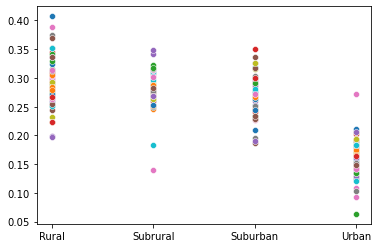

In [6]:
# Research Question Part A
join_df = pd.read_csv("full_join_df.csv")

regions_list = total_df['subnational1_code'].unique() # list of unique regions represented in the data, most likely U.S. states and Canadian provinces

plot_df = pd.DataFrame(columns = ['housing_density', 'count']) # initiating empty dataframe to run regression later

def plot_species_counts(state_name):
    """
    Returns: scatterplot displaying observed species diversity vs. housing density at a feeder. Each color represents a 
    region; y-axis values represent what proportion of the total species for a region is found in that housing density.
    
    Parameter state_name: Type string, a valid value of column "subnational1_code" from the FeederWatch observation dataset.
    """
    
    df = join_df[join_df['subnational1_code'] == state_name] # make subset of dataframe corresponding to this state
    
    # initiating two lists for plotting later
    x = ['Rural', 'Subrural', 'Suburban', 'Urban']
    counts_list = []
    
    # subsets of state data for each housing density type
    rural_df = df[df["housing_density"] == 1.0]
    subrural_df = df[df["housing_density"] == 2.0]
    suburban_df = df[df["housing_density"] == 3.0]
    urban_df = df[df["housing_density"] == 4.0]
    
    # only include states where there is at least one observation for each housing density to lessen skew from missing data
    if len(rural_df) > 0 and len(subrural_df) > 0 and len(suburban_df) > 0 and len(urban_df) > 0:
        
        # getting number of unique species in each housing density
        rural_count = len(rural_df['species_code'].unique())
        subrural_count = len(subrural_df['species_code'].unique())
        suburban_count = len(suburban_df['species_code'].unique())
        urban_count = len(urban_df['species_code'].unique())

        counts_sum = rural_count + subrural_count + suburban_count + urban_count

        # finding what proportion of the total species for a region was found in each housing density and adding to list
        counts_list.append(rural_count / counts_sum)
        counts_list.append(subrural_count / counts_sum)
        counts_list.append(suburban_count / counts_sum)
        counts_list.append(urban_count / counts_sum)

        # adding values to a global dataframe for regression later on
        plot_df.loc[len(plot_df)] = [1.0, rural_count / counts_sum]
        plot_df.loc[len(plot_df)] = [2.0, subrural_count / counts_sum]
        plot_df.loc[len(plot_df)] = [3.0, suburban_count / counts_sum]
        plot_df.loc[len(plot_df)] = [4.0, urban_count / counts_sum]
    
        # creating scatterplot
        sns.scatterplot(x = x, y = counts_list)

# looping to plot all regions
for state in regions_list:
    plot_species_counts(state)
    
plot_df

In [7]:
# creating new df with dummies for each housing density
new_df = pd.concat([plot_df, pd.get_dummies(plot_df['housing_density'], drop_first = True,)], axis=1)

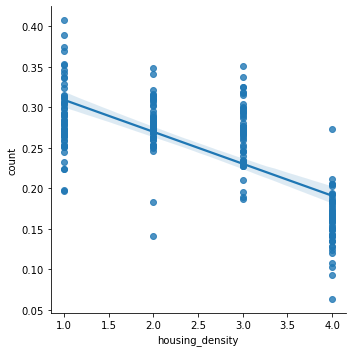

In [8]:
# visualizing data, this time with an lmplot
sns.lmplot(data = plot_df, x = 'housing_density', y = 'count')

In [11]:
# creating linear regression model
features = new_df[[2.0, 3.0, 4.0]]
target = new_df['count']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test) 
print("Score:", model.score(x_test, y_test))

print(model.coef_)
print(model.intercept_)

predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)

train_MSE = metrics.mean_squared_error(y_train, predicted_train)
test_MSE = metrics.mean_squared_error(y_test, predicted_test)

train_MAE = metrics.mean_absolute_error(y_train, predicted_train)
test_MAE = metrics.mean_absolute_error(y_test, predicted_test)

print("Train RSME is " + str(train_MSE**(1/2)))
print("Test RSME is " + str(test_MSE**(1/2)))
print("Train MAE is " + str(train_MAE))
print("Test MAE is " + str(test_MAE))

Score: 0.8220073583090366
[-0.01319442 -0.02394839 -0.12578122]
0.2910375793029062
Train RSME is 0.0377154456264334
Test RSME is 0.028211438994878168
Train MAE is 0.02814690577722218
Test MAE is 0.019835149977816605


According to this linear regression model constructed from the data using dummy variables (where the baseline condition is a feeder located in a rural area), the proportion of a state's avian species observed at feeders appears to generally decrease with increasingly urban housing densities:  

$ y = 0.291 - 0.013x_1 - 0.024x_2 - 0.126x_3 $  

The interpretation of this is that this model predicts that for a typical state, feeders in rural areas will on average observe 0.291, or 29.1%, of the total species across the whole state. Areas that are a combination of suburban/rural will generally see a decrease in this proportion of 0.013, suburban areas see a decrease of 0.024, and urban areas see a decrease of 0.126. Notably, this appears to suggest that on average, observers of bird feeders in a state's urban areas will see 16.5% (0.291-0.126) of the species observed across the state as a whole. 


### Evaluation of Significance: housing density and species proportions

While the linear model we constructed had intriguing results in terms of the relatively high score and lower errors than expected, in order to fully verify if the relationship between housing density and species diversity is statistically significant, more testing is needed. For the purposes of evaluating the R-squared value and associated p-values for each of the coefficients, we use the Ordinary Least Squares model from the package statsmodels.

In [12]:
Y = new_df['count']
X = new_df[[2.0, 3.0, 4.0]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.74e-54
Time:                        05:07:43   Log-Likelihood:                 434.80
No. Observations:                 228   AIC:                            -861.6
Df Residuals:                     224   BIC:                            -847.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2902      0.005     60.426      0.0

The relevant figures to take note of are the R-squared value of 0.672 and the $P > |t|$ column, which contains p-values for each coefficient in the model. P-values below an alpha level of 0.05 indicate high probability of the null hypothesis being able to be rejected, suggesting that observed species counts differ significantly at feeders in different housing densities.

### Interpretation and conclusions: housing density and species proportions

The R-squared value can be interpreted as the amount of variation in the responsive variable that can be explained with the independent variable. In this case, the OLS model suggests that 67.2% of the variation in species proportions can be explained by housing density.   

The p-values for feeders in mixed suburban/rural, suburban, and urban housing densities are 0.094, 0.002, and 0.000, respectively. These values indicate the probability of the attained coefficient occurring given the null is true. In this case, the null hypothesis refers to there being no difference in observed feeder species proportions across different housing densities compared to feeders in rural areas - an equal proportion of a state's total avian species are observed at each housing density. 

The p-value exceeds the critical alpha level 0.05 for both suburban and urban housing densities. This indicates that there is a statistically significant difference between observed species diversity at rural feeders relative to observed species diversity at suburban and urban feeders; that is, it appears that a greater proportion of a state's observed avian species occur at rural feeders compared to at suburban or urban feeders. However, it appears that there is not a statistically significant difference between observed species diversity at mixed suburban/rural feeders relative to rural feeders.

The final OLS model produced by statsmodels suggests the following relationship, revised from the linear regression generated with train-test-split above:

$ y = 0.2902 - 0.0114x_1 - 0.0210x_2 - 0.1284x_3 $

Rural feeders are expected to observe 29% of a region's total observed avian species. Suburban/rural mixed feeders are associated with a decrease of 1.14%; suburban with a reduction of 2.10%; urban with a reduction of 12.84%.

### Limitations: housing density and species proportions

The clearest potential limitation of this data analysis is the fact that the distribution of observers is likely different across different housing densities. For example, given a state, it is possible that many observers live in areas that have an urban or suburban housing density, overrepresenting these categories in the dataset. After all, if there are more observers in a category, they are likely to notice and identify more species, increasing the species diversities for these areas. While our analysis attempts an adjustment for this by removing states lacking observations in one or more housing densities entirely from the model, low numbers of observers for a housing density may still skew the data one way or another.

Another limitation may lie in how "rural", "suburban/rural", "suburban", and "urban" are defined to various users. Since these labels may be somewhat ambiguous and subjective, different observers may use a different housing density to describe the same location, resulting in discrepancies on how places are categorized.


______________________________________________________________________________________________________________________

## Part B: Taxonomic Groups in NY and Housing Density

### Data Analysis: Exploring and comparing the proportion of observations in each housing density
The `accipiter.csv` and `junco.csv` datasets are subsets of the New York zero-filled observation data for the genera *Accipiter* (soaring birds of prey) and *Junco* (small sparrows) respectively. We decided to visualize the proportional frequency distributions to see if the distribution of housing density for overall observation reports is the same as the distribution of housing density for the *Accipiter* or *Junco* observations respectively.

If these distributions look different, this may indicate that the genus is more commonly observed in a certain housing density. If so, we can then go further and Chi-Squared Goodness of Fit test. Although this may not be able to conclude the species prefers and is more common in that particular housing density level, it can say something about the observation frequency. 

In [14]:
accipiter_df = pd.read_csv('accipiter.csv')
junco_df = pd.read_csv('junco.csv')
accipiter_df['how_many_binary'] = np.where(accipiter_df['how_many']>0, 1, 0)
junco_df['how_many_binary'] = np.where(junco_df['how_many']>0, 1, 0)

accipiter_df = accipiter_df[accipiter_df['housing_density'].notna()]
junco_df = junco_df[junco_df['housing_density'].notna()]

In [32]:
def get_null_actual(df, genus):
    housing_density_freq = df['housing_density'].value_counts() # series with counts for observations with each housing density
    # list of categories mapped to by the floats in housing_density
    housing_density_categories = ["rural", "suburban/rural", "suburban", "urban"] 
    
    actual_in_p = [] # actual "in" proportion p for each housing density of this data
    null_in_p = [] # proportion p for each housing density/overall reported observations
    freq =[] # frequency count of the species for each housing density 
    
    # looping through numbers 1-4, the values in housing_density
    for i in range(1, 5): 
        # slicing dataframe into observations that were taken in sites with this housing density and observations that were taken otherwise
        in_df = df[df['housing_density'] == float(i)] # inside this housing density

        total_in_sum = df[df['how_many_binary']==1]['how_many_binary'].count() #total observations where accipiter is reported
        in_sum = in_df['how_many_binary'].sum() #total observations where accipiter is reported in this housing density 
        in_proportion = in_sum/total_in_sum #proportion of accipiters reported in this housing density in respect to all accipiter reports
        
        freq.append(in_sum)  
        actual_in_p.append(in_proportion)    
        
        # accessing the number of observations with this housing density and dividing by the total number of observations to normalize
        # aka finding proportion of this housing density relative to total house density data
        housing_proportion = housing_density_freq[float(i)] / df['how_many_binary'].count() 
        
        null_in_p.append(housing_proportion)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4), sharey=True)
    fig.subplots_adjust(wspace=0.65)
    housing_density_categories = ["rural", "suburban/rural", " suburban", "urban"] 
    ax1.bar(housing_density_categories, null_in_p)
    ax1.title.set_text("proportion of any reports from each housing density")
    ax2.bar(housing_density_categories, actual_in_p)
    ax2.title.set_text("proportion of "+ genus+ " reports from each housing density")
    plt.show()

    return null_in_p, actual_in_p, freq

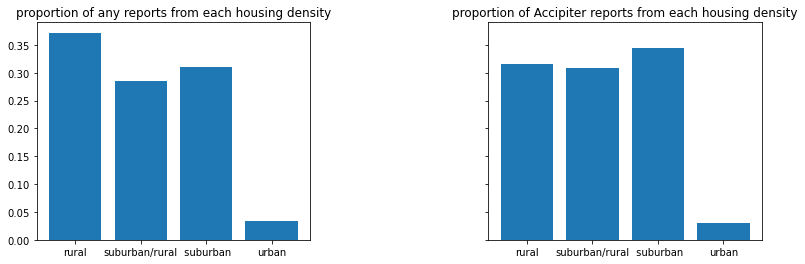

In [33]:
accipiter_null_in_p, accipiter_actual_in_p, accipiter_freq = get_null_actual(accipiter_df, "Accipiter")

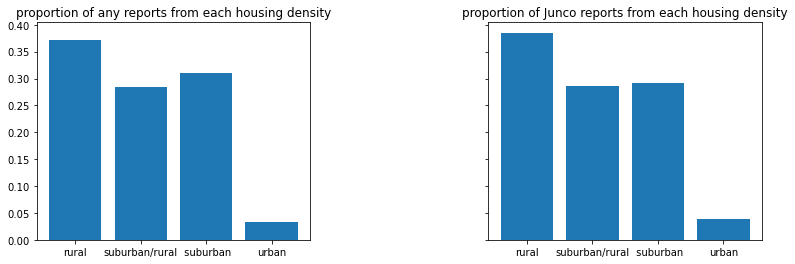

In [34]:
junco_null_in_p, junco_actual_in_p, junco_freq = get_null_actual(junco_df, "Junco")

From plotting these proportions for each housing density, it appears there are some differences between the two distributions. Particularly, the bars for the *Accipiter* genus appear to be more uniform across rural, suburban/rural, and suburban in comparison to the overall distribution of all observation report housing densities. This could indicate some preference for suburban/rural or suburban environments, since the most observation data overall is collected from rural areas but the most *Accipiter* observations occur in suburban environments. 

For the *Junco* genus, the frequency bars do somewhat match the overall observation distribution at first glance, but we want to check if the slight variation is statistically significant. The *Junco* data has more observations than the *Accipiter* data, so although the difference in proportions may be small, it may be off by a larger count factor, which we want to investigate.

### Evaluation of Significance: *Accipiter* and *Junco* Chi-Square Goodness of Fit Test 
As a result of observing some differences between the proportions of all observation locations' housing densities versus the proportions of *Accipiter* and *Junco* observation locations' housing densities, the next step is to evaluate whether this difference is statistically significant or not.

The Chi-Squared Goodness of Fit test, a type of hypothesis test, can help us do this. This test helps determine whether our sample data is likely to have come from our theoretical distribution and can be used because we have counts of observations for categorical variables representing the different types of housing density. [[Source]](https://www.jmp.com/en_sg/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html)

We would like to check whether our observed distribution of *Accipiter*/*Junco* observations are likely to have come from our overall distribution of all observation reports' housing densities or not.  

In [19]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare

In [20]:
##https://stackoverflow.com/questions/9330114/chi-squared-test-in-python
##https://www.statology.org/chi-square-goodness-of-fit-test-python/
##https://www.jmp.com/en_sg/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html

observed = accipiter_freq
print("frequency of accipiters in each housing density:", observed)
expected = np.array(accipiter_null_in_p) * np.sum(observed)
print("expected frequency of accipiters in each housing density:", expected)

chisquare(observed, expected)

frequency of accipiters in each housing density: [3132, 3069, 3425, 296]
expected frequency of accipiters in each housing density: [3689.57909085 2824.63737037 3070.76422789  337.01931089]


Power_divergenceResult(statistic=151.25924800617014, pvalue=1.4096649615280945e-32)

The result of performing a Chi-Squared Goodness of Fit test to compare the *Accipiter* observation housing densities to the overall observation housing densities has resulting in an extremly small p-value < 0.05, thus we can reject the null hypothesis.

In [35]:
observed = junco_freq
print("frequency of juncos in each housing density:", observed)
expected = np.array(junco_null_in_p) * np.sum(observed)
print("expected frequency of juncos in each housing density:", expected)

chisquare(observed, expected)

frequency of juncos in each housing density: [29685, 21984, 22428, 2963]
expected frequency of juncos in each housing density: [28655.40866166 21937.77018348 23849.33394491  2617.48720995]


Power_divergenceResult(statistic=167.40536354834228, pvalue=4.6215041195555774e-36)

The result of performing a Chi-Squared Goodness of Fit test to compare the *Junco* observation housing densities to the overall observation housing densities has resulting in an extremly small p-value < 0.05, thus we can reject the null hypothesis.

### *Accipiter* and *Junco* Chi-Square Goodness of Fit:
### Interpretations and Conclusion
The result of performing a Chi-Square Goodness of Fit test to compare the *Accipiter* observation housing densities to the overall observation housing densities has resulting in an extremly small p-value and large test statistic. Given we have 4 housing density categories, `scipy.stats` is able to determine this Chi-square test has 3 degrees of freedom, therefore this test statistic of 151.25 falls at the very far right end of the distirbution curve, being extremly unlikely that the sample data came from the theoretical distribution. A p-value < 0.05 is enough for us to feel comfortable rejecting the null hypothesis that the proportion of *Accipiter* observations in each habitat type is equal to the proportion of that habitat type across all observations. In conclusion, we are able to identify that birds of the *Accipiter* genus do likely have preferences of location based on housing density. 

Similarily, the *Junco* Chi-Square Goodness of Fit test has a p-value < 0.05, which allows us to reject the null hypothesis that the proportion of *Junco* observations in each habitat type is equal to the proportion of that habitat type across all observations. Although the graphs during data analysis appeared to be similar to the original distribution, the sheer amount of *Junco* data expected (20,000+ in comparison to the *Accipiter* expected 3000+), a small proportional difference corresponds to a relatively large difference in counts. In conclusion, we are able to identify that birds of the *Junco* genus do likely have preferences of location based on housing density. 

### Limitations
Because we are using observational data, unfortunately these results cannot allow us to conclude which housing density birds of the *Accipiter* or *Junco* genera prefer, but rather that the observation sample data for each genus does not match the overall proportion of observations in general of all species. There is a reasonable concern that the overall distribution of all observation reports from all species could be skewed due to other species that do have a strong preference, therefore skewing the "theoretical" or "population" distribution we are using for our Chi-Square test. However, we chose to investigate two common genera in the overall dataset and the two genera are quite distinct types of birds. Therefore we believe if any genera were to best fit the overall dataset's housing distribution, a more common genera that contributes more observations would be more likely to match. 

______________________________________________________________________________________________________________________

## Source Code

**[Github repository](https://github.com/marykolbas/probable-journey)**

This Github repository has all of our ipynb files, including Phase milestones for this project, `bluejay_df.csv`, and `redpoll_df.csv` which are used in *Appendix: Other Analysis*. 

**[Cornell Box](https://cornell.box.com/s/b2fjxp778bbxj2qxnsb7uqjo9arsssh7)**

This folder in Cornell Box includes all other csv files used that are too big to include on Github, including original datasets used for data cleaning (`PFW_2021_public`, `PFW-species-translation-table.csv`, `PFW_count_site_data_public_2021.csv`) and the final datasets used in the final report (`all_housing_density.csv`, `zero_filled_join.csv`, `accipiter.csv`, `junco.csv`)

**[R Code from Feederwatch](https://engagement-center.github.io/Project-FeederWatch-Zerofilling-Taxonomic-Rollup-Public/)**

This R Code was created by FeederWatch to conduct taxonomic roll-up and zero-filling, two procedures recommended by FeederWatch to limit errors. More information on how this was used can be found in *Appendix: Data Cleaning*. 

## Acknowledgments
Below are some of the resources we consulted while working on this project for understanding concepts, coding, and debugging. Some sources that were used extensively to run regressions are also cited directly in the section that they are used in. We thank all of these amazing resources for aiding the completion of this project! 

**Chi-Square Goodness of Fit Resources** 
- https://stackoverflow.com/questions/9330114/chi-squared-test-in-python
- https://www.statology.org/chi-square-goodness-of-fit-test-python/
- https://www.jmp.com/en_sg/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html
- [Debugging chisquare()](https://www.mail-archive.com/debian-bugs-rc@lists.debian.org/msg596992.html)


**Matplotlib Subplot Resources:**
- [Stack Overflow: Titling subplots](https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot)
- [Making Subplots share the same axis](https://www.skytowner.com/explore/making_subplots_share_the_same_axis_in_matplotlib)

**Linear Regression Extension Resources**
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
- https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

**Zero-Inflated Poisson Resources (used in _Appendix: Other Analyses_)**
- https://timeseriesreasoning.com/contents/zero-inflated-poisson-regression-model/

## Questions for reviewers

1. Since many of our original datasets had many columns that mostly went unused, should we leave a description of each column in Data Description or only keep the ones relevant to our analysis?
2. In our Chi-Square test for Part B, the Junco dataset appears to match the original distribution better (at first glance) but has a lower p-value. Is it accurate to say this is because the Junco dataset has much more values than the Accipiter dataset, as we claim above, or is this discrepancy abnormal and indicative that we did something wrong? 
3. Do you think any of the analyses we do in _Appendix: Other Analyses_ would be valuable to include in the final paper? We removed the Red Poll hypothesis testing for snow depth from this document because it didn't match with our modified research question revolving around housing density. The interpretations of the Logistic Regression on Blue Jays and housing density does not provide helpful predictions, but perhaps the interpretation of the slope is helpful? Or should we just focus on our NOT zero-filled regression (in this file, Part A).  